<a href="https://colab.research.google.com/github/jx-dohwan/Aiffel_EGLMS_Project/blob/main/%5BExp_9%5DFind_Person_Mode_Problems.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [Exp_9]Find Person Mode Problems

## 1. import 및 모델 가져오기

### 1) import

In [1]:
import urllib
import cv2
import numpy as np
from pixellib.semantic import semantic_segmentation
from matplotlib import pyplot as plt

### 2) model

In [2]:
# 저장할 파일 이름을 결정합니다
model_dir = "/content/drive/MyDrive/인공지능/아이펠/ES/data/human_segmentation/models/"
model_file = model_dir + "deeplabv3_xception_tf_dim_ordering_tf_kernels.h5"

# PixelLib가 제공하는 모델의 url입니다
model_url = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5'

# 다운로드를 시작합니다
urllib.request.urlretrieve(model_url, model_file)

('/content/drive/MyDrive/인공지능/아이펠/ES/data/human_segmentation/models/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5',
 <http.client.HTTPMessage at 0x7f1750194610>)

In [3]:
model = semantic_segmentation()
model.load_pascalvoc_model(model_file)

## 사람 이미지

### 1) 이미지 가져오기

(786, 1008, 3)


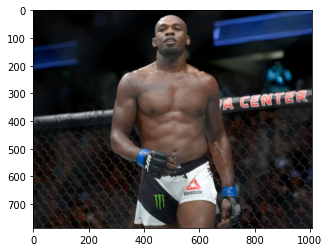

In [4]:
people_img_path = "/content/drive/MyDrive/인공지능/아이펠/ES/data/human_segmentation/images/존존스.png" 
people_img_orig = cv2.imread(people_img_path) 

print(people_img_orig.shape)
plt.imshow(cv2.cvtColor(people_img_orig, cv2.COLOR_BGR2RGB))
plt.show()

### 2) 모델에 이미지 적용

In [5]:
people_segvalues, people_output = model.segmentAsPascalvoc(people_img_path)

### 3) 이미지 정보 확인

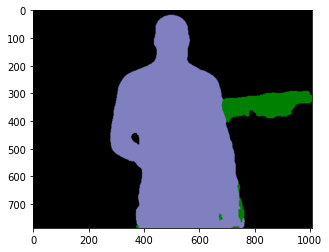

In [6]:
plt.imshow(people_output)
plt.show()

In [7]:
people_segvalues

{'class_ids': array([ 0,  2, 15]),
 'masks': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]])}

In [8]:
LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]

for people_class_id in people_segvalues['class_ids']:
    print(LABEL_NAMES[people_class_id])

background
bicycle
person


In [9]:
colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

colormap[:20]

array([[  0,   0,   0],
       [128,   0,   0],
       [  0, 128,   0],
       [128, 128,   0],
       [  0,   0, 128],
       [128,   0, 128],
       [  0, 128, 128],
       [128, 128, 128],
       [ 64,   0,   0],
       [192,   0,   0],
       [ 64, 128,   0],
       [192, 128,   0],
       [ 64,   0, 128],
       [192,   0, 128],
       [ 64, 128, 128],
       [192, 128, 128],
       [  0,  64,   0],
       [128,  64,   0],
       [  0, 192,   0],
       [128, 192,   0]])

In [10]:
colormap[15]

array([192, 128, 128])

### 4) 세그먼테이션

In [11]:
people_seg_color = (128,128,192)

(786, 1008)


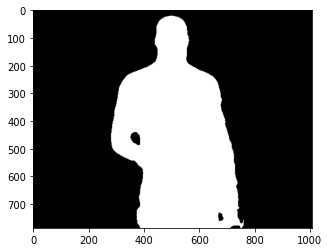

In [12]:
people_seg_map = np.all(people_output==people_seg_color, axis=-1)
print(people_seg_map.shape)
plt.imshow(people_seg_map, cmap='gray')
plt.show()

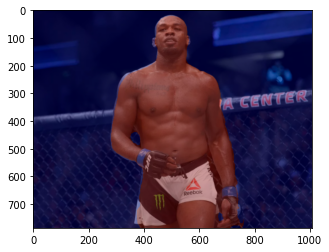

In [13]:
people_img_show = people_img_orig.copy()

# True과 False인 값을 각각 255과 0으로 바꿔줍니다
people_img_mask = people_seg_map.astype(np.uint8) * 255

# 255와 0을 적당한 색상으로 바꿔봅니다
people_color_mask = cv2.applyColorMap(people_img_mask, cv2.COLORMAP_JET)

# 원본 이미지와 마스트를 적당히 합쳐봅니다
# 0.6과 0.4는 두 이미지를 섞는 비율입니다.
people_img_show = cv2.addWeighted(people_img_show, 0.6, people_color_mask, 0.4, 0.0)

plt.imshow(cv2.cvtColor(people_img_show, cv2.COLOR_BGR2RGB))
plt.show()

### 5) 배경흐리게 하기

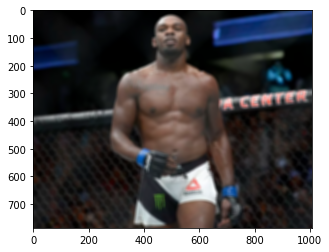

In [14]:
people_img_orig_blur = cv2.blur(people_img_orig, (13,13))  
plt.imshow(cv2.cvtColor(people_img_orig_blur, cv2.COLOR_BGR2RGB))
plt.show()

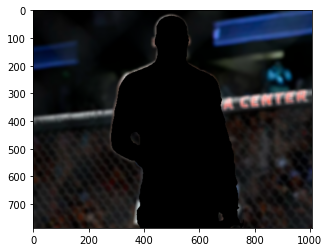

In [15]:
people_img_mask_color = cv2.cvtColor(people_img_mask, cv2.COLOR_GRAY2BGR)
people_img_bg_mask = cv2.bitwise_not(people_img_mask_color)
people_img_bg_blur = cv2.bitwise_and(people_img_orig_blur, people_img_bg_mask)
plt.imshow(cv2.cvtColor(people_img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

### 6) 흐린 배경과 원본 영상 합성

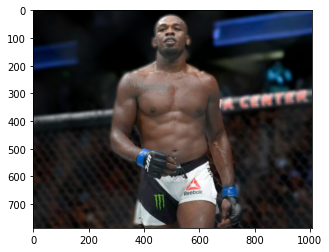

In [16]:
people_img_concat = np.where(people_img_mask_color==255, people_img_orig, people_img_bg_blur)
plt.imshow(cv2.cvtColor(people_img_concat, cv2.COLOR_BGR2RGB))
plt.show()

## 동물 이미지

### 1) 이미지 가져오기

(448, 717, 3)


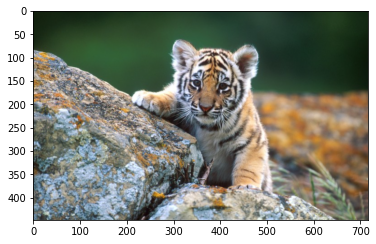

In [17]:
animal_img_path = "/content/drive/MyDrive/인공지능/아이펠/ES/data/human_segmentation/images/호냥이.png" 
animal_img_orig = cv2.imread(animal_img_path) 

print(animal_img_orig.shape)
plt.imshow(cv2.cvtColor(animal_img_orig, cv2.COLOR_BGR2RGB))
plt.show()

### 2) 모델에 이미지 적용

In [18]:
animal_segvalues, animal_output = model.segmentAsPascalvoc(animal_img_path)

### 3) 이미지 정보 확인

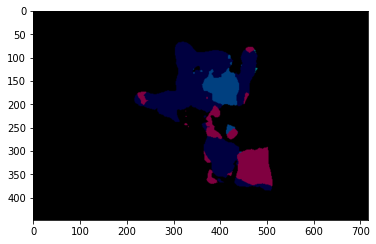

In [19]:
plt.imshow(animal_output)
plt.show()

In [20]:
animal_segvalues

{'class_ids': array([ 0,  3,  8, 12, 17]),
 'masks': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]])}

In [21]:
LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]

for animal_class_id in animal_segvalues['class_ids']:
    print(LABEL_NAMES[animal_class_id])

background
bird
cat
dog
sheep


In [22]:
colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

colormap[:20]

array([[  0,   0,   0],
       [128,   0,   0],
       [  0, 128,   0],
       [128, 128,   0],
       [  0,   0, 128],
       [128,   0, 128],
       [  0, 128, 128],
       [128, 128, 128],
       [ 64,   0,   0],
       [192,   0,   0],
       [ 64, 128,   0],
       [192, 128,   0],
       [ 64,   0, 128],
       [192,   0, 128],
       [ 64, 128, 128],
       [192, 128, 128],
       [  0,  64,   0],
       [128,  64,   0],
       [  0, 192,   0],
       [128, 192,   0]])

In [23]:
colormap[14]

array([ 64, 128, 128])

### 4) 세그먼테이션

In [24]:
animal_seg_color = (0,0 ,0)

(448, 717)


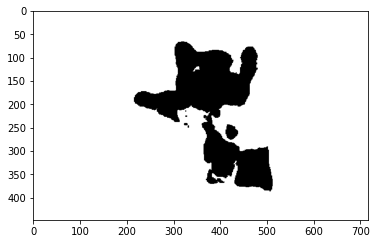

In [25]:
animal_seg_map = np.all(animal_output==animal_seg_color, axis=-1)
print(animal_seg_map.shape)
plt.imshow(animal_seg_map, cmap='gray')
plt.show()

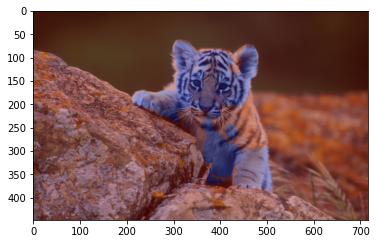

In [26]:
animal_img_show = animal_img_orig.copy()

# True과 False인 값을 각각 255과 0으로 바꿔줍니다
animal_img_mask = animal_seg_map.astype(np.uint8) * 255

# 255와 0을 적당한 색상으로 바꿔봅니다
animal_color_mask = cv2.applyColorMap(animal_img_mask, cv2.COLORMAP_JET)

# 원본 이미지와 마스트를 적당히 합쳐봅니다
# 0.6과 0.4는 두 이미지를 섞는 비율입니다.
animal_img_show = cv2.addWeighted(animal_img_show, 0.6, animal_color_mask, 0.4, 0.0)

plt.imshow(cv2.cvtColor(animal_img_show, cv2.COLOR_BGR2RGB))
plt.show()

### 5) 배경흐리게 하기

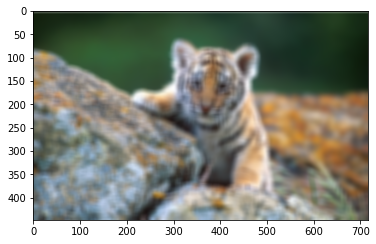

In [27]:
animal_img_orig_blur = cv2.blur(animal_img_orig, (13,13))  
plt.imshow(cv2.cvtColor(animal_img_orig_blur, cv2.COLOR_BGR2RGB))
plt.show()

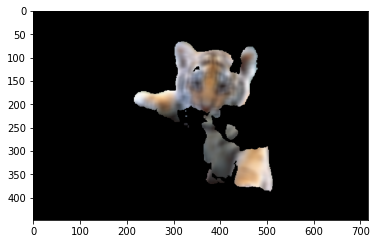

In [28]:
animal_img_mask_color = cv2.cvtColor(animal_img_mask, cv2.COLOR_GRAY2BGR)
animal_img_bg_mask = cv2.bitwise_not(animal_img_mask_color)
animal_img_bg_blur = cv2.bitwise_and(animal_img_orig_blur, animal_img_bg_mask)
plt.imshow(cv2.cvtColor(animal_img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

### 6) 흐린 배경과 원본 영상 합성

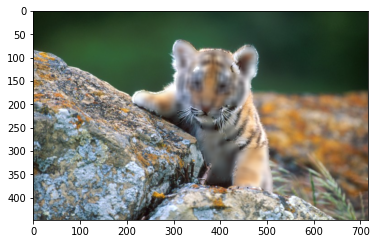

In [29]:
animal_img_concat = np.where(animal_img_mask_color==255, animal_img_orig, animal_img_bg_blur)
plt.imshow(cv2.cvtColor(animal_img_concat, cv2.COLOR_BGR2RGB))
plt.show()

## 동물 이미지

### 1) 이미지 가져오기

(654, 984, 3)


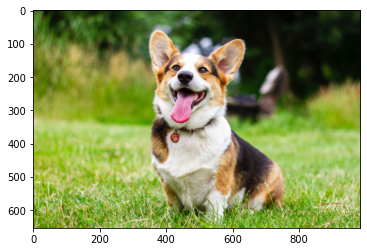

In [30]:
animal_img_path = "/content/drive/MyDrive/인공지능/아이펠/ES/data/human_segmentation/images/강아지.png" 
animal_img_orig = cv2.imread(animal_img_path) 

print(animal_img_orig.shape)
plt.imshow(cv2.cvtColor(animal_img_orig, cv2.COLOR_BGR2RGB))
plt.show()

### 2) 모델에 이미지 적용

In [31]:
animal_segvalues, animal_output = model.segmentAsPascalvoc(animal_img_path)

### 3) 이미지 정보 확인

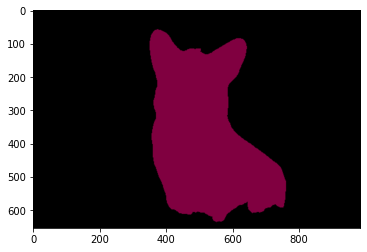

In [32]:
plt.imshow(animal_output)
plt.show()

In [33]:
animal_segvalues

{'class_ids': array([ 0, 12]),
 'masks': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]])}

In [34]:
LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]

for animal_class_id in animal_segvalues['class_ids']:
    print(LABEL_NAMES[animal_class_id])

background
dog


In [35]:
colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

colormap[:20]

array([[  0,   0,   0],
       [128,   0,   0],
       [  0, 128,   0],
       [128, 128,   0],
       [  0,   0, 128],
       [128,   0, 128],
       [  0, 128, 128],
       [128, 128, 128],
       [ 64,   0,   0],
       [192,   0,   0],
       [ 64, 128,   0],
       [192, 128,   0],
       [ 64,   0, 128],
       [192,   0, 128],
       [ 64, 128, 128],
       [192, 128, 128],
       [  0,  64,   0],
       [128,  64,   0],
       [  0, 192,   0],
       [128, 192,   0]])

In [36]:
colormap[12]

array([ 64,   0, 128])

### 4) 세그먼테이션

In [37]:
animal_seg_color = (128, 0, 64)

(654, 984)


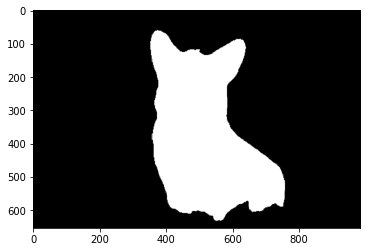

In [38]:
animal_seg_map = np.all(animal_output==animal_seg_color, axis=-1)
print(animal_seg_map.shape)
plt.imshow(animal_seg_map, cmap='gray')
plt.show()

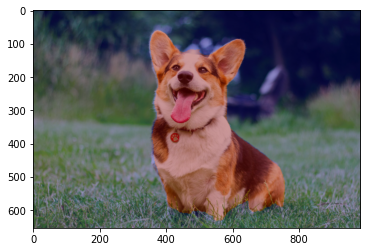

In [39]:
animal_img_show = animal_img_orig.copy()

# True과 False인 값을 각각 255과 0으로 바꿔줍니다
animal_img_mask = animal_seg_map.astype(np.uint8) * 255

# 255와 0을 적당한 색상으로 바꿔봅니다
animal_color_mask = cv2.applyColorMap(animal_img_mask, cv2.COLORMAP_JET)

# 원본 이미지와 마스트를 적당히 합쳐봅니다
# 0.6과 0.4는 두 이미지를 섞는 비율입니다.
animal_img_show = cv2.addWeighted(animal_img_show, 0.6, animal_color_mask, 0.4, 0.0)

plt.imshow(cv2.cvtColor(animal_img_show, cv2.COLOR_BGR2RGB))
plt.show()

### 5) 배경흐리게 하기

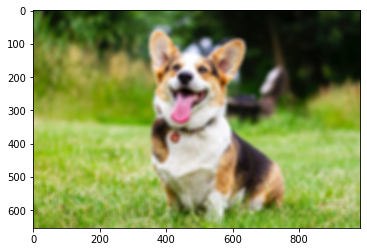

In [40]:
animal_img_orig_blur = cv2.blur(animal_img_orig, (13,13))  
plt.imshow(cv2.cvtColor(animal_img_orig_blur, cv2.COLOR_BGR2RGB))
plt.show()

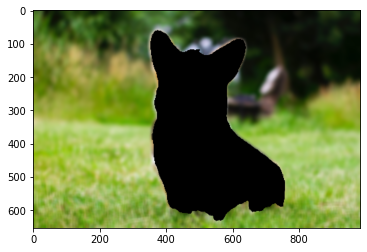

In [41]:
animal_img_mask_color = cv2.cvtColor(animal_img_mask, cv2.COLOR_GRAY2BGR)
animal_img_bg_mask = cv2.bitwise_not(animal_img_mask_color)
animal_img_bg_blur = cv2.bitwise_and(animal_img_orig_blur, animal_img_bg_mask)
plt.imshow(cv2.cvtColor(animal_img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

### 6) 흐린 배경과 원본 영상 합성

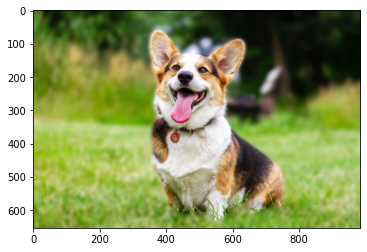

In [42]:
animal_img_concat = np.where(animal_img_mask_color==255, animal_img_orig, animal_img_bg_blur)
plt.imshow(cv2.cvtColor(animal_img_concat, cv2.COLOR_BGR2RGB))
plt.show()

## 배경 이미지 바꾸기

### 1) 이미지 가져오기

(500, 800, 3)


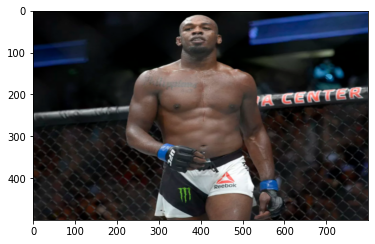

In [43]:
people_img_path = "/content/drive/MyDrive/인공지능/아이펠/ES/data/human_segmentation/images/존존스.png" 
people_img_orig = cv2.imread(people_img_path) 
people_img_orig = cv2.resize(people_img_orig, (800, 500))
print(people_img_orig.shape)
plt.imshow(cv2.cvtColor(people_img_orig, cv2.COLOR_BGR2RGB))
plt.show()

(500, 800, 3)


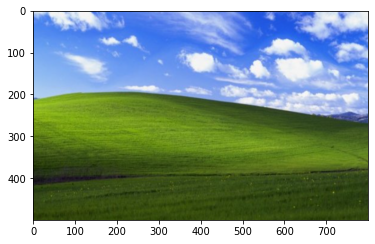

In [44]:
bg_img_path = "/content/drive/MyDrive/인공지능/아이펠/ES/data/human_segmentation/images/배경.png" 
bg_img_orig = cv2.imread(bg_img_path) 
bg_img_orig = cv2.resize(bg_img_orig, (800, 500))
print(bg_img_orig.shape)
plt.imshow(cv2.cvtColor(bg_img_orig, cv2.COLOR_BGR2RGB))
plt.show()

### 2) 모델에 이미지 적용

In [45]:
people_segvalues, people_output = model.segmentAsPascalvoc(people_img_path)

In [46]:
people_output = cv2.resize(people_output, (800, 500))

### 3) 이미지 정보 확인

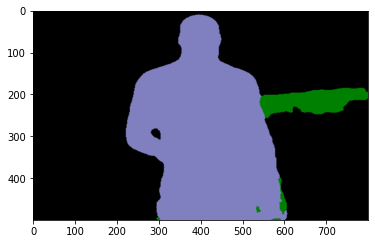

In [47]:
plt.imshow(people_output)
plt.show()

In [48]:
people_segvalues

{'class_ids': array([ 0,  2, 15]),
 'masks': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]])}

In [49]:
LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]

for people_class_id in people_segvalues['class_ids']:
    print(LABEL_NAMES[people_class_id])

background
bicycle
person


In [50]:
colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

colormap[:20]

array([[  0,   0,   0],
       [128,   0,   0],
       [  0, 128,   0],
       [128, 128,   0],
       [  0,   0, 128],
       [128,   0, 128],
       [  0, 128, 128],
       [128, 128, 128],
       [ 64,   0,   0],
       [192,   0,   0],
       [ 64, 128,   0],
       [192, 128,   0],
       [ 64,   0, 128],
       [192,   0, 128],
       [ 64, 128, 128],
       [192, 128, 128],
       [  0,  64,   0],
       [128,  64,   0],
       [  0, 192,   0],
       [128, 192,   0]])

In [51]:
colormap[15]

array([192, 128, 128])

### 4) 세그먼테이션

In [52]:
people_seg_color = (128,128,192)

(500, 800)


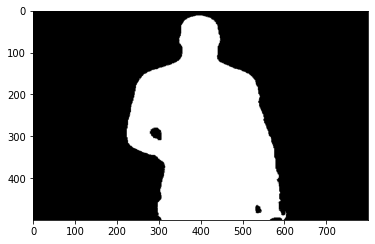

In [53]:
people_seg_map = np.all(people_output==people_seg_color, axis=-1)
print(people_seg_map.shape)
plt.imshow(people_seg_map, cmap='gray')
plt.show()

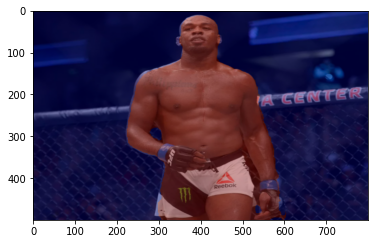

In [54]:
people_img_show = people_img_orig.copy()

# True과 False인 값을 각각 255과 0으로 바꿔줍니다
people_img_mask = people_seg_map.astype(np.uint8) * 255

# 255와 0을 적당한 색상으로 바꿔봅니다
people_color_mask = cv2.applyColorMap(people_img_mask, cv2.COLORMAP_JET)

# 원본 이미지와 마스트를 적당히 합쳐봅니다
# 0.6과 0.4는 두 이미지를 섞는 비율입니다.
people_img_show = cv2.addWeighted(people_img_show, 0.6, people_color_mask, 0.4, 0.0)

plt.imshow(cv2.cvtColor(people_img_show, cv2.COLOR_BGR2RGB))
plt.show()

### 5) 배경흐리게 하기

In [55]:
people_img_mask_color = cv2.cvtColor(people_img_mask, cv2.COLOR_GRAY2BGR)
people_img_bg_mask = cv2.bitwise_not(people_img_mask_color)

### 6) 흐린 배경과 원본 영상 합성

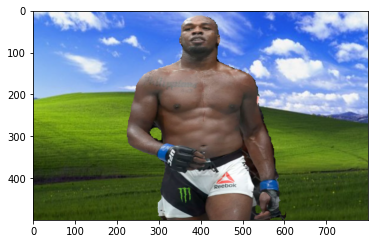

In [56]:
people_img_concat = np.where(people_img_mask_color==255, people_img_orig, bg_img_orig)
plt.imshow(cv2.cvtColor(people_img_concat, cv2.COLOR_BGR2RGB))
plt.show()